# [실습] 이변량분석 종합실습

## 환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# 1.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [75]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
target = 'Survived'

target_mean = titanic[target].mean()

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

In [105]:
feature = 'Age'

1) 그래프 : histogram, densityplot

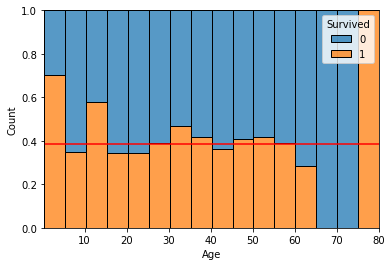

In [106]:
sns.histplot(x=feature, data = titanic, hue = target, multiple = 'fill', bins = 16)
plt.axhline(target_mean, color = 'r')
plt.show()

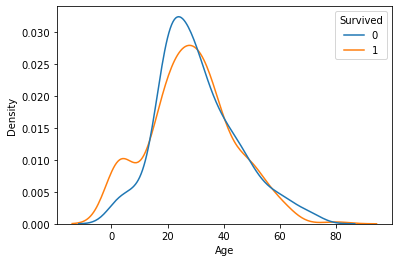

In [79]:
sns.kdeplot(x=feature, data = titanic, hue =target, common_norm=False)
plt.show()

2) 수치화 : 로지스틱회귀

In [7]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
temp = titanic.loc[titanic[feature].notnull()]

model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64


3) 관계 평가하기

* 그래프상에서, 
    * 10대 이하의 탑승객이 전체 평균대비 생존율이 높고, 20~30대, 60대에서 생존율이 낮아 진다.
    * 나이에 따라서 생존여부가 차이가 있어 보인다. (아주 커보이지는 않음)
* 로지스틱회귀로 부터
    * p 값은 0.05보다 작게 나옴.(그러나 완전 0에 수렴하는 것은 아님)

* 결론 : 관계가 있다.(강한 관계는 아님)

4) 추가 분석할 내용 정리

* 나이에 따른 생존여부 그래프가 크로스 되는 지점이 많이 발생됨 ==> 나이대를 적절하게 나눠서 비교해볼 필요가 있다고 생각됩니다.


#### ② Fare --> Survived

In [80]:
feature = 'Fare'

1) 그래프 : histogram, densityplot

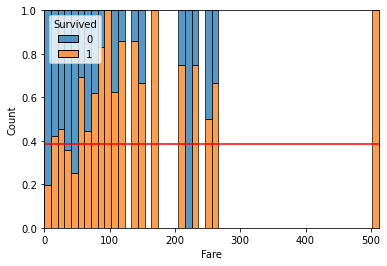

In [84]:
sns.histplot(x=feature, data = titanic, hue = target, multiple = 'fill', bins = 50)
# 전체 구간이 0~512 달러 이므로,  대략 한 구간이 10달러 정도 되도록 50으로 나눔.
plt.axhline(target_mean, color = 'r')
plt.show()

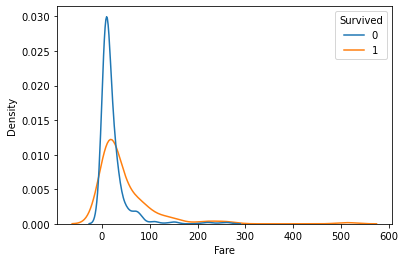

In [10]:
sns.kdeplot(x=feature, data = titanic, hue =target, common_norm=False)
plt.show()

2) 수치화 : 로지스틱회귀

In [11]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(titanic[target], titanic[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


3) 관계 평가하기

* 그래프상에서, 
    * 0~10달러 에 생존율이 전체평균 대비 굉장히 낮음. 
    * 10~30달러 에 생존율이 전체평균 대비 살짝 높다가 ==> 이유 확인 필요
    * 30~50달러 에 다시 생존율이 낮아짐
    * 50달러 이후부터는 대부분의 구간에서 생존율이 높음. ==> 이유 확인 필요.
        * 운임 50달러의 기준/ 의미가 무엇일까?
    * 그래프상으로는 나이보다, 운임이 더 관련이 높아 보임.
* 로지스틱회귀로 부터
    * p 값은 0.05보다 작게 나옴.(0.01)

* 결론 : p 값이 0.05 와 차이가 크지 않다면 약한 관계로 볼 수 있으나, 로지스틱 회귀로 판정하는 것은 미봉책.
그러므로, 그래프 관점에서, 중간 정도의 관계로 볼수 있다.

4) 추가 분석할 내용 정리

* 역시 운임의 구간에 대한 분석과 함께 구간을 나눠서(범주로 변환하여) 생존여부와의 관계를 살펴볼 필요가 있다.

In [100]:
bins = [0, 10, 30, 50, np.inf]
labels = ['L2', 'L1', 'M', 'H' ]
titanic['Fare_Group'] = pd.cut(titanic['Fare'], bins = bins , labels = labels
                               , right = False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,L2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,H
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,L2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,H
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,L2


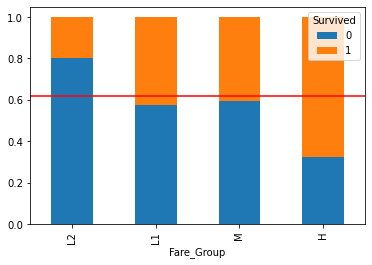

카이제곱통계량 109.28927980021261
p-value 1.5605723946549092e-23


In [103]:
temp = pd.crosstab(titanic['Fare_Group'], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

table = pd.crosstab(titanic[target], titanic['Fare_Group'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

* 로지스틱 회귀로 검정하는 방식은 미봉책입니다.
* 구간을 나누고 범주 vs 범주 관점에서 접근하여 카이제곱 검정을 수행하면 오히려 이것이 더 적절한 방법일 수 있습니다. 다만, 구간을 어떻게 나누는지에 따라서 결과가 달라지게 됩니다.

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

In [85]:
feature = 'Sex'

1) 교차표(pd.crosstab())

In [86]:
pd.crosstab(titanic[target], titanic[feature], normalize='columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


2) 시각화( Stacked Bar, Mosaic)

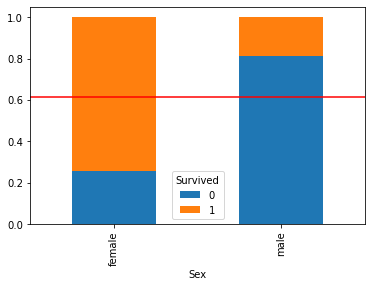

In [87]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()



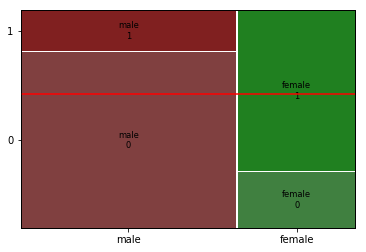

In [88]:
mosaic(titanic, [ feature, target])
plt.axhline(1- target_mean, color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [89]:
table = pd.crosstab(titanic[target], titanic[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58


4) 관계 평가하기

* 성별과 생존여부는 완전! 관련이 있다.

5) 추가 분석하기

#### ② Pclass --> Survived

In [90]:
feature = 'Pclass'

1) 교차표(pd.crosstab())

In [91]:
pd.crosstab(titanic[target], titanic[feature], normalize='columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


2) 시각화( Stacked Bar, Mosaic)

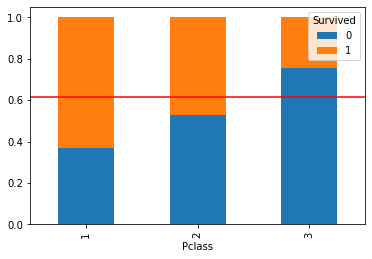

In [92]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

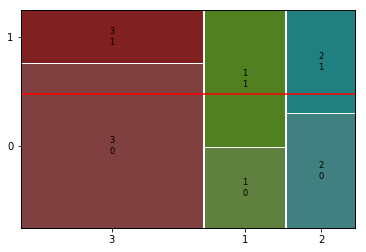

In [93]:
mosaic(titanic, [ feature, target])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [94]:
table = pd.crosstab(titanic[target], titanic[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23


4) 관계 평가하기

* 객실 등급과 생존여부는 완전! 관련이 있다.
* 성별과 비교(P 값으로)를 굳이 해본다면, 객실등급보다 성별이 더 강한 관계를 갖고 있다고 볼수 있다.
    * 단, 카이제곱 통계량을 가지고 비교하면 안됨. 자유도가 다르기 때문!

5) 추가 분석하기

* 객실등급과 성별의 조합으로 생존여부를 분석해보자.
    * {1,2,3} * {m,f} = 단순 조합은 총 6가지 범주 {(1,m), (1,f), (2,m), (2,f), (3,m), (3,f)}
    * 일단 6가지로 구분하고 나서, 통합시킬 대상을 선정하는 것 필요.

In [104]:
titanic.groupby(['Pclass','Sex'], as_index = False)['Survived'].mean()

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


#### ③ Embarked --> Survived

In [95]:
feature = 'Embarked'

1) 교차표(pd.crosstab())

In [96]:
pd.crosstab(titanic[target], titanic[feature], normalize='columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


2) 시각화( Stacked Bar, Mosaic)

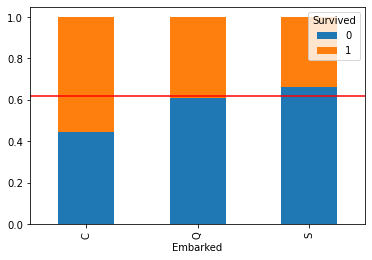

In [97]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

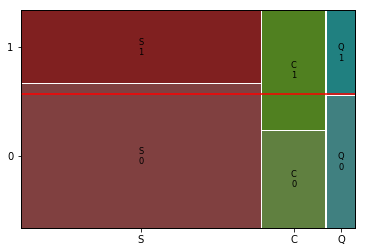

In [98]:
mosaic(titanic, [ feature, target])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [26]:
table = pd.crosstab(titanic[target], titanic[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 26.48914983923762
p-value 1.769922284120912e-06


4) 관계 평가하기

* 승선지역과 생존여부는 관련이 있다. (아주 강한 관계는 아니다.)

5) 추가 분석하기

* 승선지역과 객실등급과 관련이 있지 않을까...

### (3) 관계 정리하기

① 강한관계

* 성별, 객실등급, 운임(범주형)

② 중간관계

* 나이, 승선지역

③ 관계없음

* 없음

# 2.숫자형 Y

## 2.1 보스톤 집값 데이터 : 기본

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수. 단위 1000달러)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [107]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


* target : medv



In [108]:
target = 'medv'

### (1) 숫자형 X --> 숫자형 Y

* 시각화 : scatter, jointplot  
* 수치화 : 상관분석  
* 관계 평가

#### ① crim(범죄율) --> medv(집값)

In [109]:
feature = 'crim'

1) 시각화 : scatter, jointplot 

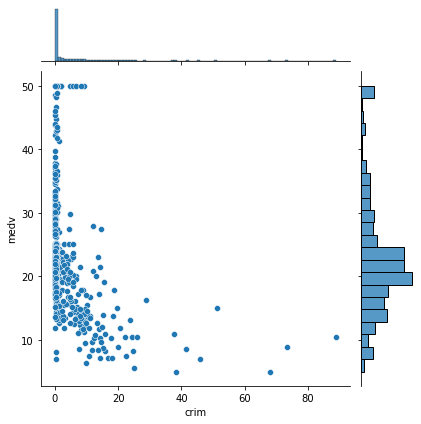

In [110]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [31]:
spst.pearsonr(boston[feature], boston[target])

(-0.3883046085868114, 1.1739870821941874e-19)

3) 관계 평가하기

* 범죄율이 높아질수록 집값은 낮아지는 경향이 분명히 보입니다.
* 상관계수가 -0.388 이므로 중간 정도의 관계라고 볼 수 있습니다.
* 여기서 P value는 상관계수가 0인지 아닌지에 대한 검정 의미 입니다.

4) 추가 분석할 내용 정리

* 범죄율 거의 0 인 지역이 집중되어 있고, 집값의 범위가 상당히 넓습니다. 그래서 따로 띄어 놓고 분석할 필요가 있습니다.
* 집값이 5만 달러에 몰려 있는 부분은 왜 그러한지 확인 필요.

#### ② ptratio(교사학생 비율) --> medv(집값)

In [32]:
feature = 'ptratio'

1) 시각화 : scatter, jointplot 

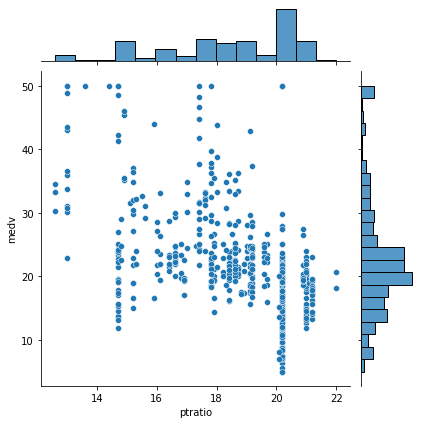

In [33]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [34]:
spst.pearsonr(boston[feature], boston[target])

(-0.5077866855375619, 1.609509478472518e-34)

3) 관계 평가하기

* 상관분석 상에는 좀 강한 상관관계를 나타냅니다.

4) 추가 분석할 내용 정리

* 상관계수는 연속된 두 숫자형간의 관계가 직선에 가까운지를 나타내는데, 직선 보다는 계단형으로 보입니다.
* 차트에서는 교사1명당 학생수가 14명 이전, 14 ~ 20, 20 ~ 으로 구분되어 보입니다.
* 이 구간을 범주로 변환해서 비교해볼 필요가 있습니다.

In [112]:
bins = [0, 14, 20, 50]
labels = ['L','M','H']
boston['ptratio2'] = pd.cut(boston['ptratio'], right = False
                           , bins = bins, labels = labels)
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2,ptratio2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,M
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,M
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0,M
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0,M
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0,M


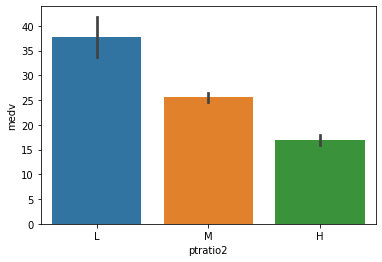

F_onewayResult(statistic=106.35920595953505, pvalue=2.997005581712739e-39)

In [114]:
sns.barplot(x='ptratio2', y=target, data=boston)
plt.show()

pt2_l = boston.loc[boston['ptratio2']=='L', target]
pt2_m = boston.loc[boston['ptratio2']=='M', target]
pt2_h = boston.loc[boston['ptratio2']=='H', target]

spst.f_oneway(pt2_l, pt2_m, pt2_h)


각 그룹별 평균 관점에서 볼때, 더 차이가 명확해 보임!

#### ③ lstat(하위계층 비율) --> medv(집값)

In [35]:
feature = 'lstat'

1) 시각화 : scatter, jointplot 

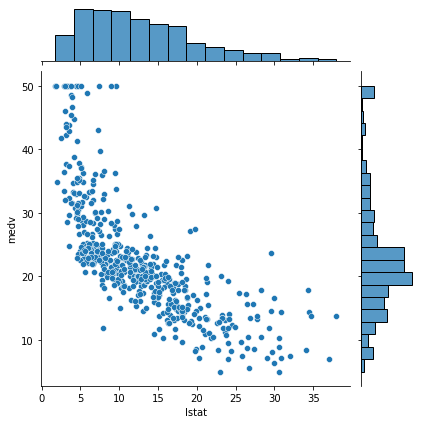

In [36]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [37]:
spst.pearsonr(boston[feature], boston[target])

(-0.7376627261740146, 5.081103394387836e-88)

3) 관계 평가하기

* 강한 상관관계!

4) 추가 분석할 내용 정리

#### ④ 추가1 --> medv(집값)

1) 시각화 : scatter, jointplot 

2) 수치화 : 상관분석

3) 관계 평가하기

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 숫자형 Y

* 시각화 : 평균비교 barplot
* 수치화 : t-test, anova
* 관계 평가

#### ① chas(찰스강변) --> medv(집값)

In [38]:
feature = 'chas'

1) 시각화 : 평균비교 barplot

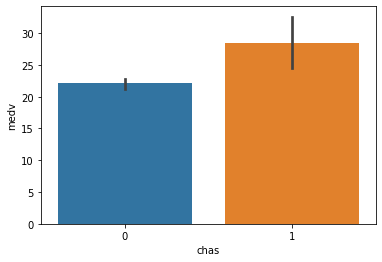

In [39]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x=feature, y=target, data=boston)
plt.show()

2) 수치화 : t-test

In [40]:
chas0 = boston.loc[boston[feature]==0, target]
chas1 = boston.loc[boston[feature]==1, target]

In [41]:
spst.ttest_ind(chas1, chas0)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

3) 관계 평가하기

* 차트와 가설검정의 결과로 볼때, 관계가 있으나 강하지는 않다.

4) 추가 분석할 내용 정리

#### ① zn2(대저택 비율 범주, 0,1,2) --> medv(집값)

In [42]:
feature = 'zn2'

1) 시각화 : 평균비교 barplot

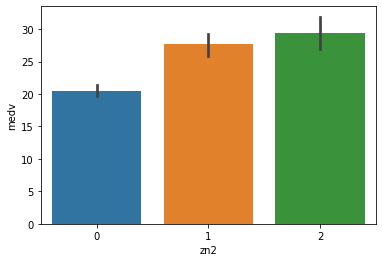

In [43]:
sns.barplot(x=feature, y=target, data=boston)
plt.show()

2) 수치화 : anova

In [44]:
zn2_0 = boston.loc[boston[feature]==0, target]
zn2_1 = boston.loc[boston[feature]==1, target]
zn2_2 = boston.loc[boston[feature]==2, target]

In [45]:
spst.f_oneway(zn2_0, zn2_1, zn2_2)

F_onewayResult(statistic=41.56175654117286, pvalue=1.9727794047741185e-17)

3) 관계 평가하기

대 저택 비율과 집값은 강한 관계를 나타낸다.

4) 추가 분석할 내용 정리

### (3) 관계 정리하기

① 강한관계

lstat, ptratio2, zn2

② 중간관계

chas, crim

③ 관계없음

## 2.2 car seat 매출 분석 : 심화

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|


In [117]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [47]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

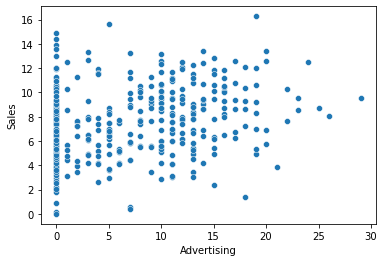

In [48]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

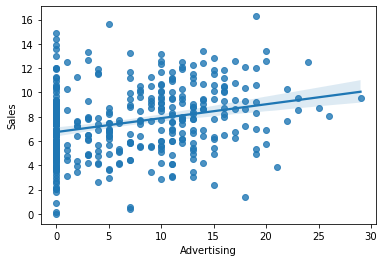

In [49]:
sns.regplot(x=var, y = target, data = data)
plt.show()

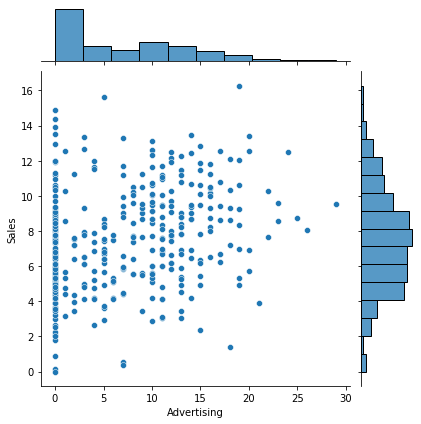

In [50]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [51]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2695067813769019, p-value : 4.377677110302732e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고 예산에 따라 판매량은 약한 관계가 있다.
* 그러나 이게 다인가?
* 광고 예산이 0인 지역이 대부분. 그러므로 0을 빼고 비교해보는게 필요.
* 광고 예산 자체보다, 지역 인구당 광고비 비율 등을 추가로 도출해서 비교해보는 것 필요.


#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

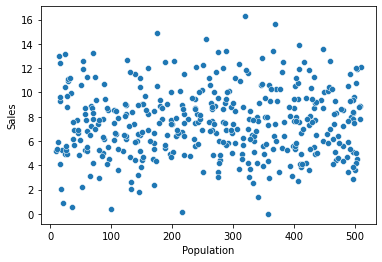

In [52]:
var = 'Population'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

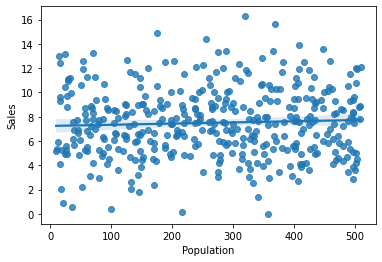

In [53]:
sns.regplot(x=var, y = target, data = data)
plt.show()

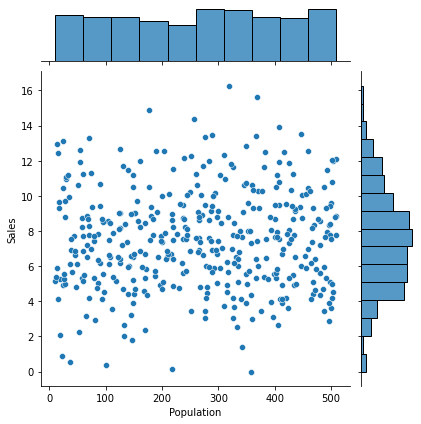

In [54]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [55]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.050470984472039196, p-value : 0.31398160931903


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 인구수에 따라 판매량에 차이가 없어 보임.
* 그런데 이상함. 인구가 많을 수록 판매량이 증가하는 것 아닐까?
    * 인구수만 보면 안되나? 그럼 어떻게하면 좋을까?

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

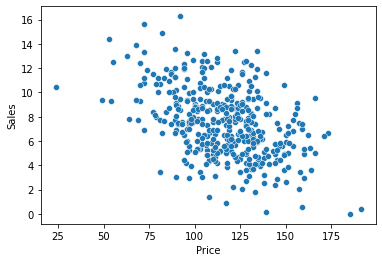

In [56]:
var = 'Price'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

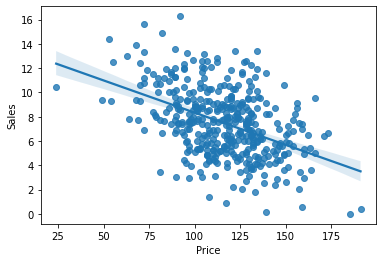

In [57]:
sns.regplot(x=var, y = target, data = data)
plt.show()

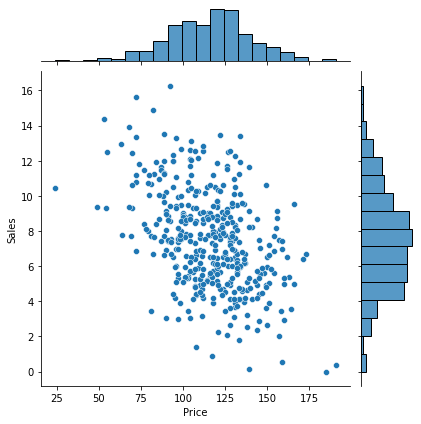

In [58]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [59]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.44495072784657264, p-value : 7.618187011912723e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 자사 상품 판매가가 높을 수록 판매량이 낮아짐. 상관관계가 강하지는 않음.

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

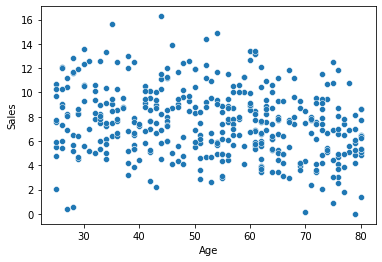

In [60]:
var = 'Age'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

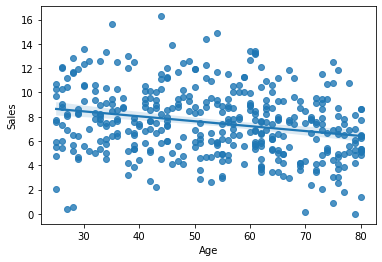

In [61]:
sns.regplot(x=var, y = target, data = data)
plt.show()

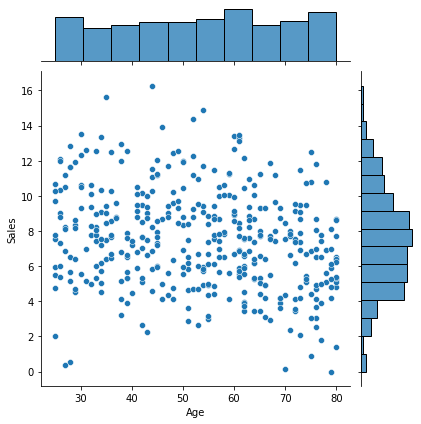

In [62]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [63]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.23181543960457665, p-value : 2.788949839371276e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

평균 연령에 따라 판매량에는 차이가 있으나 아주 약한 관계입니다.

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

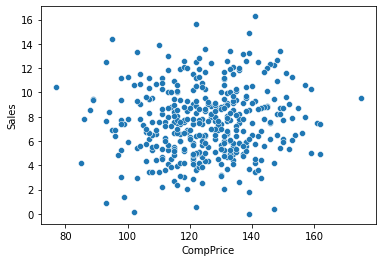

In [64]:
var = 'CompPrice'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

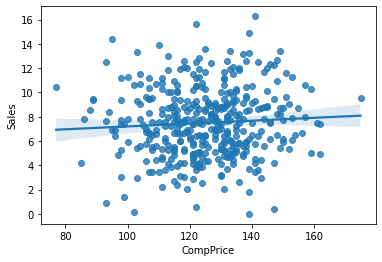

In [65]:
sns.regplot(x=var, y = target, data = data)
plt.show()

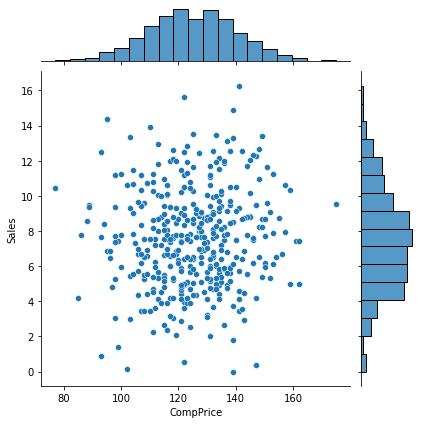

In [66]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [67]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062151, p-value : 0.2009398289418295


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

관계가 없습니다. 그런데 찜찜....

* 가설 : 경쟁사 가격은 우리 매출에 영향을 줄 것이다. 
    * 대립가설은 기각?
    * 가설을 수정하면 어떨까?
    * 경쟁사 가격과 자사제품 가격의 차이를 가격경쟁력이라고 보고 분석하면 어떨까?
    

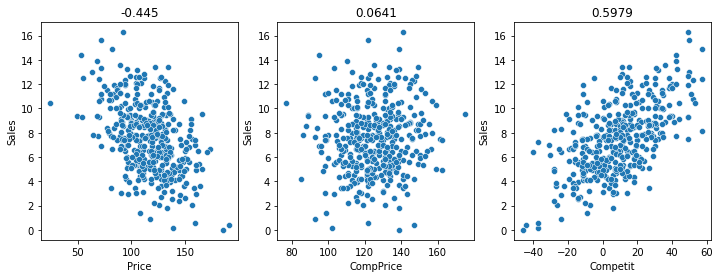

In [129]:
data['Competit'] = data['CompPrice'] - data['Price']

plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
sns.scatterplot(x = 'Price', y ='Sales', data = data)
result = spst.pearsonr(data['Price'], data['Sales'])
plt.title(round(result[0],4))

plt.subplot(1,3,2)
sns.scatterplot(x = 'CompPrice', y ='Sales', data = data)
result = spst.pearsonr(data['CompPrice'], data['Sales'])
plt.title(round(result[0],4))

plt.subplot(1,3,3)
sns.scatterplot(x = 'Competit', y ='Sales', data = data)
result = spst.pearsonr(data['Competit'], data['Sales'])
plt.title(round(result[0],4))
plt.show()

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

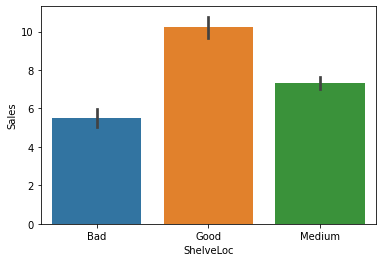

In [68]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [69]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 진열상태와 판매량은 강한 관계가 있습니다!

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

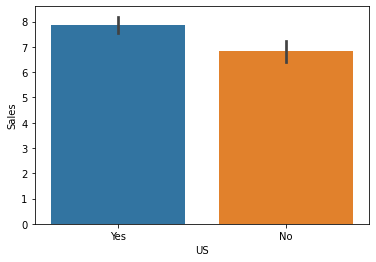

In [70]:
var = 'US'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [71]:
d_y = data.loc[data[var]=='Yes', target]
d_n = data.loc[data[var]=='No', target]

spst.ttest_ind(d_y, d_n)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 국내외 여부에 따른 판매랑에 차이가 있으나 크지는 않습니다.

### (3) 관계 정리하기

① 강한관계

선반진열상태, 가격경쟁력

② 중간관계

광고비, 자사상품 가격, 평균연령, US

③ 관계없음

인구수, 경쟁사 가격